# Pricing and Hedging of European options under Black-Scholes and introduction of transaction costs 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import norm
import plotly.graph_objects as go
from BlackScholes import BS
from BS_transac_costs import BS_transac_costs
from Leland import Leland

In [17]:
Option = BS(S = 100,K = 100, T = 1, sigma = 0.2, r = 0.05, position = "long", q = 0, option_type = "put")

In [18]:
Option_tc = BS_transac_costs(100,100,1,0.2,0.05,0.1,"long")

In [24]:
Option_Leland = Leland(100,100,1,0.2,0.05,0.02,"long","daily")

In [5]:
Option.pricing_BS(100,0)

array(5.57352602)

In [6]:
Option.Delta(100,0)

array(-0.36316935)

# Graph representing Delta levels

In [7]:
def call_delta(S, K, T, r, sigma):
    T = np.maximum(T, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

In [8]:
S = 100
r = 0.05
sigma = 0.2
strike_values = np.linspace(80, 120, 50)
time_values = np.linspace(0.01, 2, 50)  # time in years
K, T = np.meshgrid(strike_values, time_values)
Delta = call_delta(S, K, T, r, sigma)

fig = go.Figure(data=[go.Surface(x=K, y=T, z=Delta, colorscale='Viridis')])
fig.update_layout(
    title='Interactive Delta Surface for a European Call Option',
    scene=dict(
        xaxis_title='Strike (K)',
        yaxis_title='Time to Maturity (T)',
        zaxis_title='Delta'
    )
)
fig.show()

In [9]:
Option.price_trajectory('daily')

array([100.        ,  99.33886988, 101.11729476, 103.4233188 ,
       103.03848083, 102.64262104, 103.12038175, 104.00823773,
       102.87421325, 101.24791925, 101.81259927, 100.57267188,
       101.64441601, 101.44393089, 101.59423006, 102.61449128,
       102.95855504, 103.36096993, 101.64975534, 101.1490916 ,
       101.22241006, 102.42508799, 100.45878786, 101.25967787,
       101.11270954, 101.56234457, 102.20806953, 101.94955023,
        99.63177899,  98.65337413,  97.00950371,  96.2698471 ,
        97.25114115,  98.80212255,  99.06272898,  98.21041637,
        99.6295125 ,  98.6610613 ,  99.60602562, 100.31997994,
       102.70886605, 101.45275117, 102.26564372, 102.43117167,
       103.26304576, 102.83664434, 104.15303052, 106.4585071 ,
       107.3052087 , 107.22900266, 105.88851177, 105.07333074,
       108.24128679, 108.70406104, 108.05254437, 107.46619471,
       109.26125487, 103.97186307, 101.77842505, 103.27042985,
       101.87356004, 103.3364929 , 103.5225858 , 101.32

In [10]:
H = Option.Hedging('hourly')
H

,Price,Option price,Delta,Buy,Depenses,Holdings,Portfolio,Error
0,100.000000,5.573526,-0.363169,-3.631693e-01,41.890461,-36.316935,5.573526,0.000000
1,100.390456,5.432036,-0.355924,7.245412e-03,41.164476,-35.731366,5.433110,0.001074
2,100.645479,5.340745,-0.351246,4.678403e-03,40.694977,-35.351275,5.343702,0.002957
3,100.565751,5.367686,-0.352757,-1.511188e-03,40.848297,-35.475245,5.373052,0.005366
4,101.183981,5.151967,-0.341466,1.129095e-02,39.707184,-34.550866,5.156318,0.004351
...,...,...,...,...,...,...,...,...
1508,93.135279,6.851494,-1.000000,-9.406782e-10,99.712407,-93.135279,6.577128,0.274366
1509,94.191211,5.798868,-1.000000,7.606915e-12,99.715705,-94.191211,5.524493,0.274375
1510,94.498100,5.495287,-1.000000,-1.028910e-11,99.719002,-94.498100,5.220903,0.274384
1511,94.301049,5.695644,-1.000000,-3.996803e-15,99.722300,-94.301049,5.421251,0.274393


In [13]:
Sims = Option.MonteCarlo('monthly',10000)
terminal_values = [sim[-1,0] for sim in Sims]
Hedge_error = [np.mean(sim[:,1]) for sim in Sims]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_35782/3501864589.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



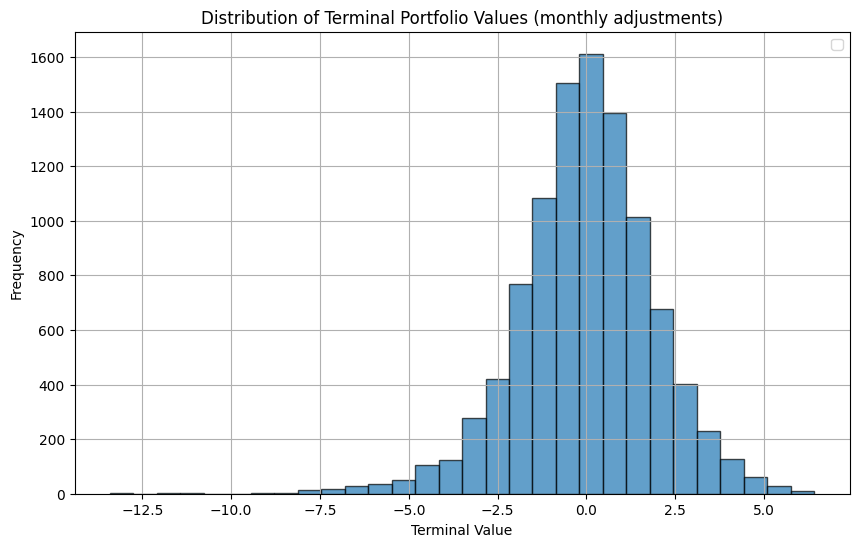

In [14]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values (monthly adjustments)')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_35782/2280826159.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



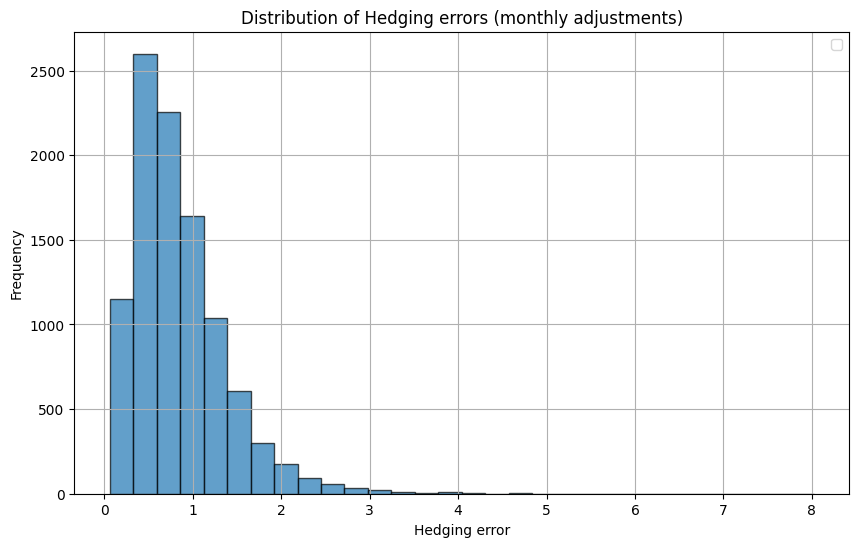

In [15]:
plt.figure(figsize=(10,6))
plt.hist(Hedge_error, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hedging errors (monthly adjustments)')
plt.xlabel('Hedging error')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

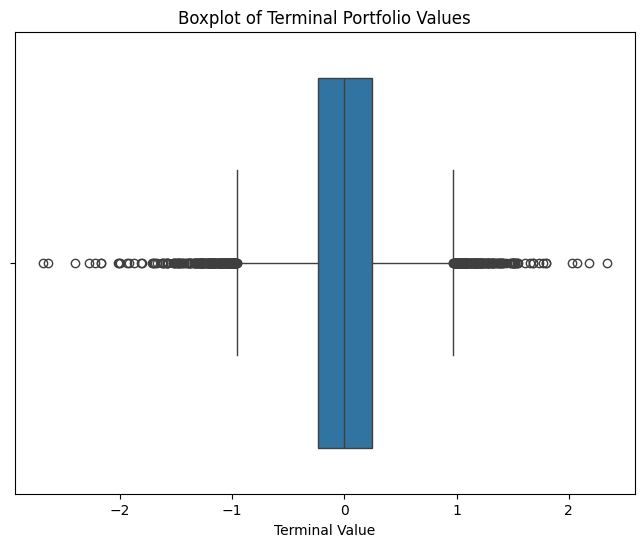

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=terminal_values)
plt.title('Boxplot of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.show()

In [15]:
mean_val = np.mean(terminal_values)
median_val = np.median(terminal_values)
std_val = np.std(terminal_values)

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")


Mean: -0.00
Median: 0.00
Standard Deviation: 0.43


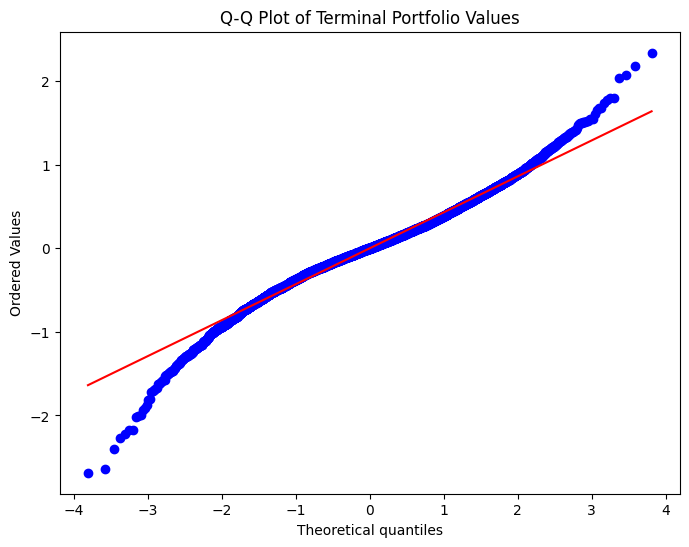

In [16]:
plt.figure(figsize=(8,6))
stats.probplot(terminal_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Terminal Portfolio Values')
plt.show()

In [17]:
normalized_values = (terminal_values - np.mean(terminal_values)) / np.std(terminal_values)
stat, p = kstest(normalized_values, 'norm')
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Kolmogorov-Smirnov Test: Statistics=0.046, p=0.000
Sample does not look Gaussian (reject H0)


# Introduction of transaction costs into Black-Scholes

In [18]:
H_tc = Option_tc.Hedging('hourly')
H_tc

,Price,Option price,Delta,Buy,Cash,Holdings,Portfolio,Error
0,100.000000,10.450584,0.636831,6.368307e-01,-59.600788,63.683065,4.082277,6.368307
1,100.397188,10.700740,0.644201,7.370381e-03,-60.412779,64.675972,4.263193,6.437547
2,100.574933,10.811269,0.647452,3.251442e-03,-60.770496,65.117489,4.346992,6.464276
3,100.176342,10.550422,0.640004,-7.448016e-03,-60.096983,64.113306,4.016322,6.534100
4,99.678810,10.230092,0.630595,-9.409302e-03,-59.250879,62.856975,3.606096,6.623996
...,...,...,...,...,...,...,...,...
1508,104.316607,4.329838,0.999982,5.573412e-05,-273.810570,104.314683,-169.495887,173.825724
1509,104.826914,4.836834,1.000000,1.838617e-05,-273.803635,104.826908,-168.976727,173.813561
1510,105.228167,5.234781,1.000000,5.569559e-08,-273.794587,105.228167,-168.566420,173.801201
1511,105.470843,5.474150,1.000000,1.119882e-12,-273.785534,105.470843,-168.314691,173.788840


In [19]:
Sims_tc = Option_tc.MonteCarlo('daily',10000)
terminal_values_tc = [sim[-1,0] for sim in Sims_tc]
Hedge_error_tc = [np.mean(sim[:,1]) for sim in Sims_tc]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_67733/4123953.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



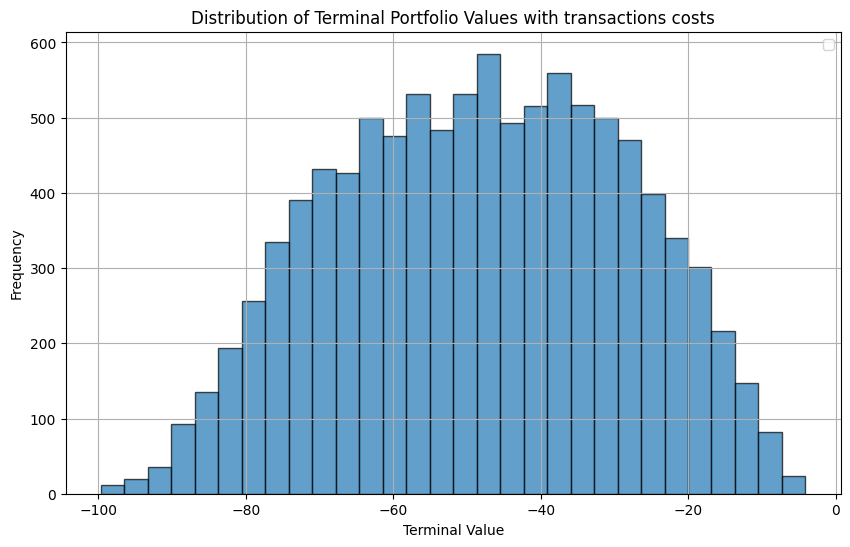

In [20]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values_tc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values with transactions costs')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_67733/745649285.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



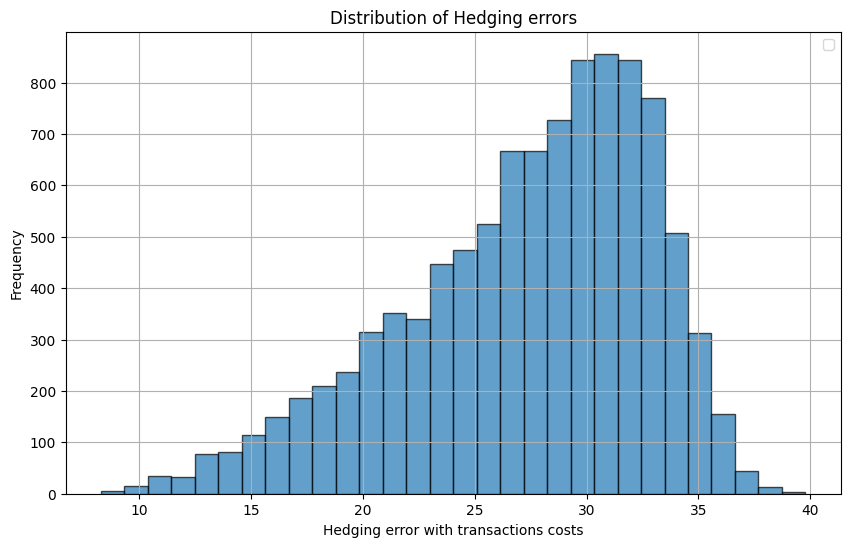

In [21]:
plt.figure(figsize=(10,6))
plt.hist(Hedge_error_tc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hedging errors')
plt.xlabel('Hedging error with transactions costs')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Shortcomings of the Black Scholes model

### - constant risk free rate and volatility (easily fixable)
### - no dividends from the underlying (can easily be fixed with Merton)
### - no consideration of transaction costs 
### - relies on continous adjustment in hedging (doesn't work with transaction costs)

# Leland Model

- Leland proposes a modification of the variance in the black scholes model to take into account the increased riskiness in the option introduced by transaction costs.
- The new variance is : $\sigma_L = \sigma\sqrt{1+\sqrt{\frac{2}{\pi}}\frac{c}{\sigma \Delta t}}$

In [20]:
P_BS = Option.pricing_BS(100,0)
P_BS_tc = Option_tc.pricing_BS(100,0)
P_Leland = Option_Leland.pricing_Leland(100,0)
print(f'Black Scholes price : {P_BS}; BS with costs price : {P_BS_tc}; Leland price : {P_Leland}')

Black Scholes price : 5.573526022256971; BS with costs price : 10.450583572185565; Leland price : 73.66376827390424


In [25]:
Sims_leland = Option_Leland.MonteCarlo(10000)
terminal_values_leland = [sim[-1,0] for sim in Sims_leland]
Hedge_error_leland = [np.mean(sim[:,1]) for sim in Sims_leland]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_35782/294925179.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



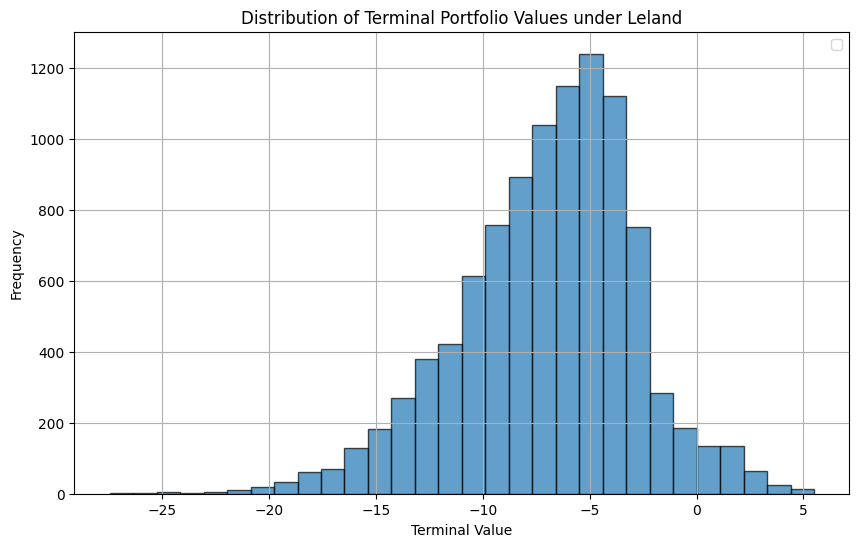

In [26]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values_leland, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values under Leland')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_35782/598037251.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



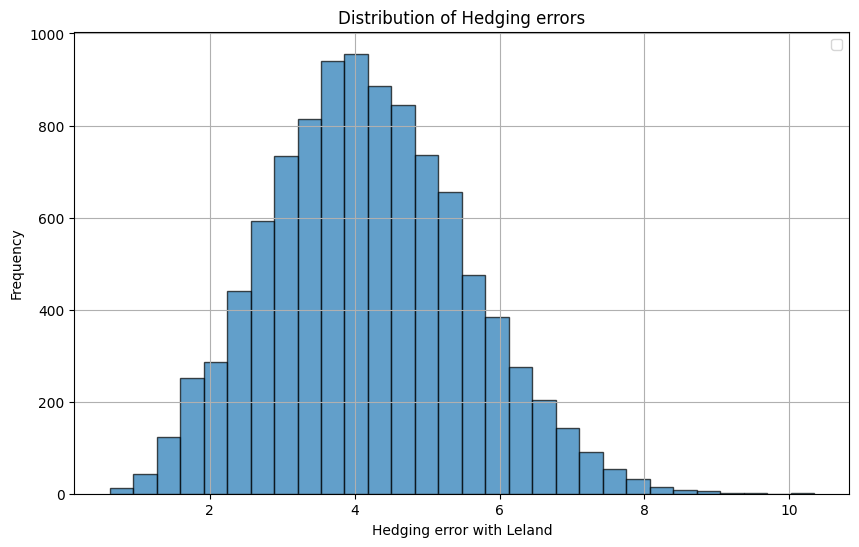

In [27]:
plt.figure(figsize=(10,6))
plt.hist(Hedge_error_leland, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hedging errors')
plt.xlabel('Hedging error with Leland')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()